In [1]:
import pandas as pd
# Load dataset
df = pd.read_csv("D:/New folder/insurance.csv")

In [2]:
#Shape of the dataset (rows, columns)
print(df.shape)

(1338, 7)


In [3]:
#Columns names
print("\nColumns:\n", df.columns.tolist())


Columns:
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [4]:
#First 5 Rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df)


In [9]:
#Checking Changes after Encoding
print(df_encoded.head())

   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400        True     False      False   
1   18  33.770         1   1725.55230       False      True       True   
2   28  33.000         3   4449.46200       False      True       True   
3   33  22.705         0  21984.47061       False      True       True   
4   32  28.880         0   3866.85520       False      True       True   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0        True             False             False             False   
1       False             False             False              True   
2       False             False             False              True   
3       False             False              True             False   
4       False             False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             Fals

In [10]:
# Features and target
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

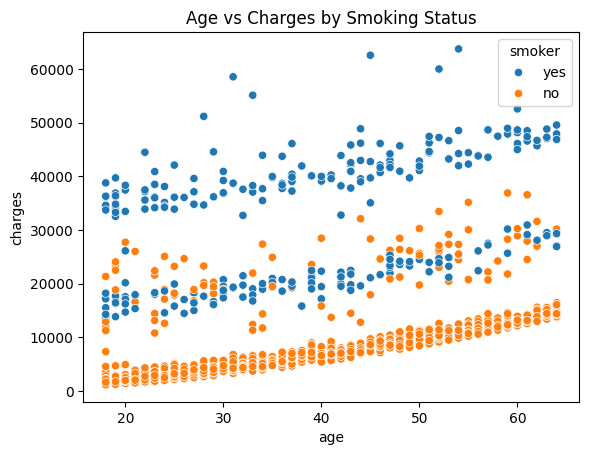

In [16]:
# Age vs Charges
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Charges by Smoking Status')
plt.show()

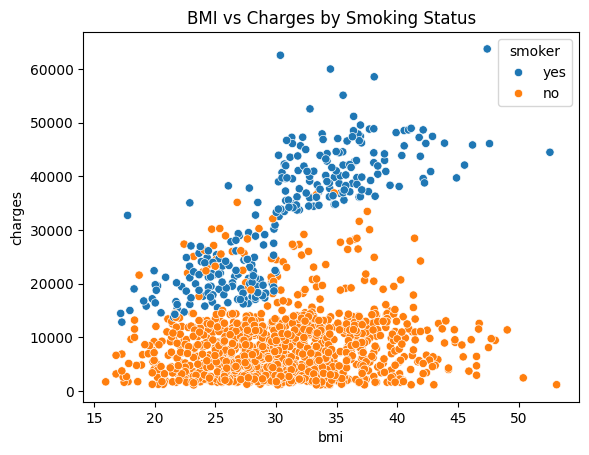

In [17]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs Charges by Smoking Status')
plt.show()


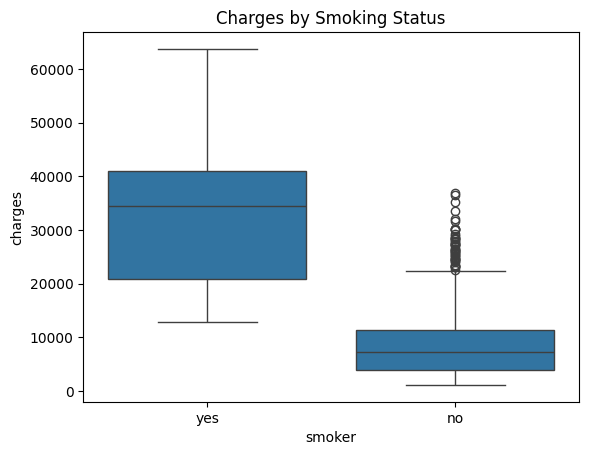

In [18]:
# Boxplot: Smoker vs Charges
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [23]:

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


Mean Absolute Error (MAE): 2541.61
Root Mean Squared Error (RMSE): 4677.69
